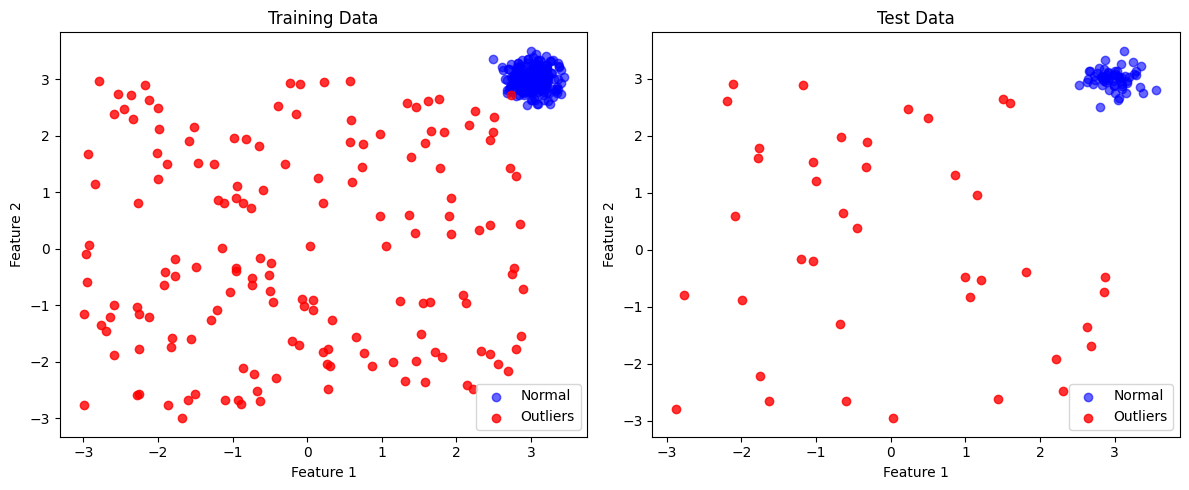

In [9]:
# ex1
import numpy as np
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data

# dataset
X_train, X_test, y_train, y_test = generate_data(
    n_train=400,
    n_test=100,
    n_features=2,
    contamination=0.4,
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', alpha=0.6, label='Normal')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', alpha=0.8, label='Outliers')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='blue', alpha=0.6, label='Normal')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='red', alpha=0.8, label='Outliers')
plt.title('Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

--Test Data--
True Negatives (TN):  60
False Positives (FP): 0
False Negatives (FN): 11
True Positives (TP):  29

Balanced Accuracy: 0.863


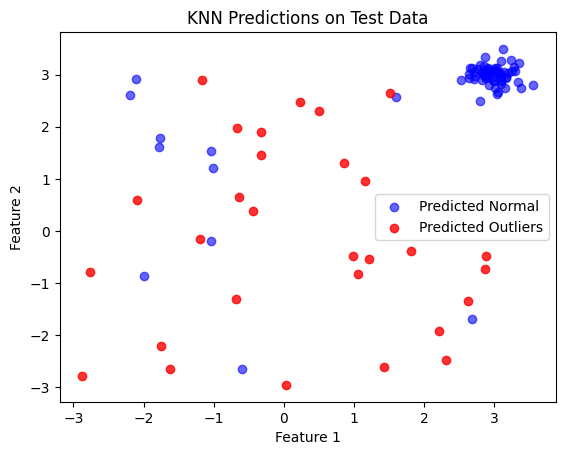


--Train Data--
True Negatives (TN):  240
False Positives (FP): 0
False Negatives (FN): 78
True Positives (TP):  82

Balanced Accuracy: 0.756


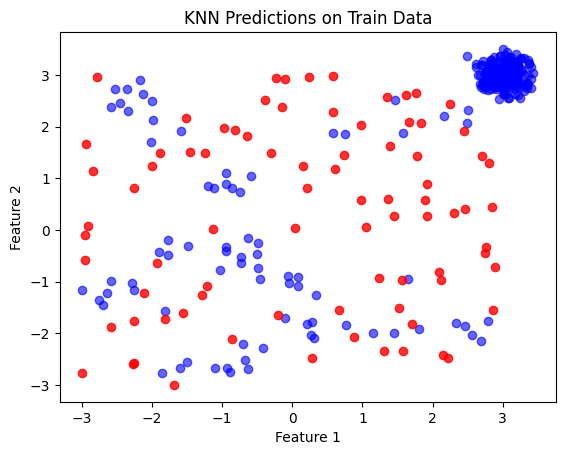

In [14]:
# ex2
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt

#knn_model = KNN(contamination=0.1)
# knn_model = KNN(contamination=0.2)
knn_model = KNN(contamination=0.3)
# knn_model = KNN(contamination=0.4)

knn_model.fit(X_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

train_scores = knn_model.decision_scores_
test_scores = knn_model.decision_function(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
balanced_accuracy = (tp/(tp+fn) + tn/(tn+fp)) / 2
print("--Test Data--")
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")
print(f"\nBalanced Accuracy: {balanced_accuracy:.3f}")
plt.scatter(X_test[y_test_pred == 0, 0], X_test[y_test_pred == 0, 1], c='blue', alpha=0.6, label='Predicted Normal')
plt.scatter(X_test[y_test_pred == 1, 0], X_test[y_test_pred == 1, 1], c='red', alpha=0.8, label='Predicted Outliers')
plt.title('KNN Predictions on Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
balanced_accuracy_train = (tp_train/(tp_train+fn_train) + tn_train/(tn_train+fp_train)) / 2
print("\n--Train Data--")
print(f"True Negatives (TN):  {tn_train}")
print(f"False Positives (FP): {fp_train}")
print(f"False Negatives (FN): {fn_train}")
print(f"True Positives (TP):  {tp_train}")
print(f"\nBalanced Accuracy: {balanced_accuracy_train:.3f}")
plt.scatter(X_train[y_train_pred == 0, 0], X_train[y_train_pred == 0, 1], c='blue', alpha=0.6, label='Predicted Normal')
plt.scatter(X_train[y_train_pred == 1, 0], X_train[y_train_pred == 1, 1], c='red', alpha=0.8, label='Predicted Outliers')
plt.title('KNN Predictions on Train Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


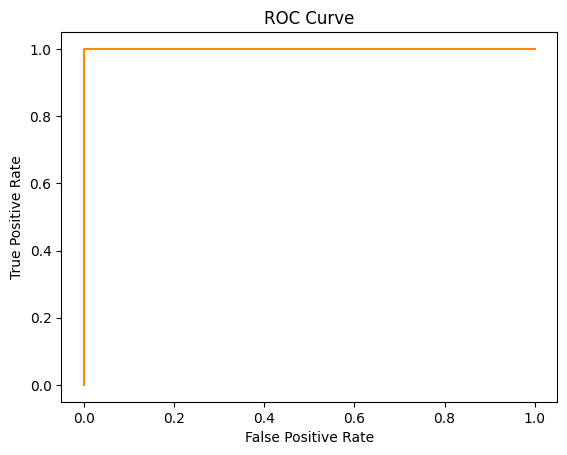

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, test_scores)

plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

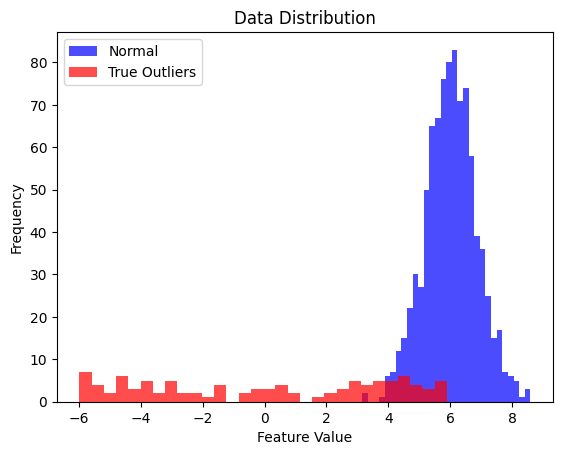

True Negatives (TN):  871
False Positives (FP): 29
False Negatives (FN): 29
True Positives (TP):  71

TPR (Sensitivity): 0.710
TNR (Specificity): 0.968
Balanced Accuracy: 0.839


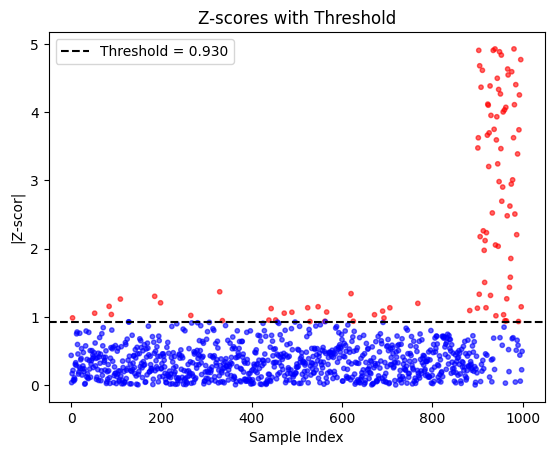

In [12]:
# ex3
from scipy import stats
from pyod.utils.data import generate_data

X_train_1d, _, y_train_1d, _ = generate_data(
    n_train=1000,
    n_test=0,
    n_features=1,
    contamination=0.1,
    random_state=42
)

X_flat = X_train_1d.flatten()
y_flat = y_train_1d.flatten()

plt.hist(X_flat[y_flat == 0], bins=30, alpha=0.7, color='blue', label='Normal')
plt.hist(X_flat[y_flat == 1], bins=30, alpha=0.7, color='red', label='True Outliers')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Data Distribution')
plt.legend()
plt.show()

z_scores = np.abs(stats.zscore(X_flat))

contamination_rate = 0.1
threshold_z = np.quantile(z_scores, 1 - contamination_rate)

# clasificare
y_pred_zscore = (z_scores > threshold_z).astype(int)

tn, fp, fn, tp = confusion_matrix(y_flat, y_pred_zscore).ravel()

tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
balanced_accuracy_zscore = (tpr + tnr) / 2

print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")
print(f"\nTPR (Sensitivity): {tpr:.3f}")
print(f"TNR (Specificity): {tnr:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_zscore:.3f}")

colors = ['red' if pred == 1 else 'blue' for pred in y_pred_zscore]
plt.scatter(range(len(z_scores)), z_scores, c=colors, alpha=0.6, s=10)
plt.axhline(y=threshold_z, color='black', linestyle='--', label=f'Threshold = {threshold_z:.3f}')
plt.xlabel('Sample Index')
plt.ylabel('|Z-scor|')
plt.title('Z-scores with Threshold')
plt.legend()
plt.show()

Mean vector μ: [ 2 -1  3]
Covariance matrix Σ:
[[ 2.   0.5  0.2]
 [ 0.5  1.5 -0.3]
 [ 0.2 -0.3  1. ]]

Cholesky decomposition L:
[[ 1.41421356  0.          0.        ]
 [ 0.35355339  1.17260394  0.        ]
 [ 0.14142136 -0.298481    0.94387981]]

Normal samples: 1000
Outliers: 100
Contamination rate: 9.1%


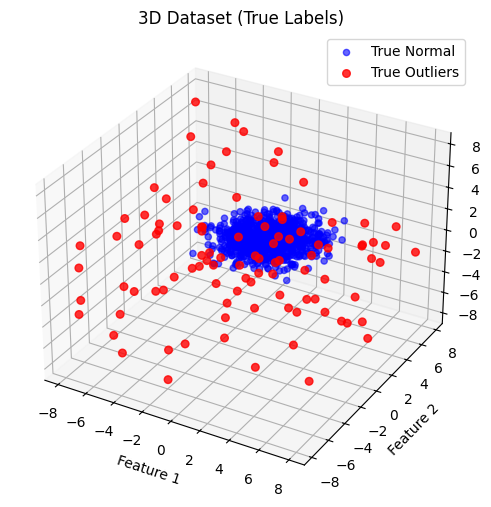


Mahalanobis distance threshold: 2.057


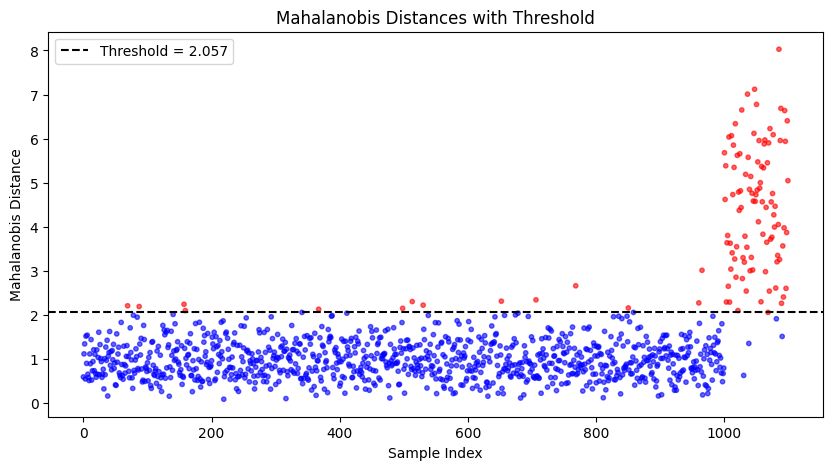

True Negatives (TN):  986
False Positives (FP): 14
False Negatives (FN): 4
True Positives (TP):  96

TPR (Sensitivity): 0.960
TNR (Specificity): 0.986
Balanced Accuracy: 0.973


In [ ]:
# ex4
from scipy import stats
from scipy.linalg import cholesky
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mu = np.array([2, -1, 3])  # Mean vector
sigma = np.array([[2, 0.5, 0.2], 
                  [0.5, 1.5, -0.3], 
                  [0.2, -0.3, 1]])  # Covariance matrix

print("Mean vector μ:", mu)
print("Covariance matrix Σ:")
print(sigma)

# Cholesky
L = cholesky(sigma, lower=True)
print("\nCholesky decomposition L:")
print(L)

n_samples = 1000
contamination_rate = 0.1

# Generate normal samples: x ~ N(0, I)
x_standard = np.random.standard_normal((n_samples, 3))
X_normal = (L @ x_standard.T).T + mu

n_outliers = int(n_samples * contamination_rate)
outliers = np.random.uniform(-8, 8, (n_outliers, 3))  # Random outliers
X_combined = np.vstack([X_normal, outliers])

# Create labels (0 = normal, 1 = outlier)
y_true = np.concatenate([np.zeros(n_samples), np.ones(n_outliers)])

print(f"\nNormal samples: {n_samples}")
print(f"Outliers: {n_outliers}")
print(f"Contamination rate: {n_outliers/len(X_combined)*100:.1f}%")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_combined[y_true == 0, 0], X_combined[y_true == 0, 1], X_combined[y_true == 0, 2], 
           c='blue', alpha=0.6, s=20, label='True Normal')
ax.scatter(X_combined[y_true == 1, 0], X_combined[y_true == 1, 1], X_combined[y_true == 1, 2], 
           c='red', alpha=0.8, s=30, label='True Outliers')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Dataset (True Labels)')
ax.legend()
plt.show()

# Calculate Mahalanobis distances
mean_combined = np.mean(X_combined, axis=0)
cov_combined = np.cov(X_combined.T)

# Mahalanobis distance for each point
mahal_distances = []
for point in X_combined:
    diff = point - mean_combined
    mahal_dist = np.sqrt(diff.T @ np.linalg.inv(cov_combined) @ diff)
    mahal_distances.append(mahal_dist)

mahal_distances = np.array(mahal_distances)

threshold_mahal = np.quantile(mahal_distances, 1 - contamination_rate)
print(f"\nMahalanobis distance threshold: {threshold_mahal:.3f}")

# Classify based on threshold
y_pred = (mahal_distances > threshold_mahal).astype(int)

plt.figure(figsize=(10, 5))
colors = ['red' if pred == 1 else 'blue' for pred in y_pred]
plt.scatter(range(len(mahal_distances)), mahal_distances, c=colors, alpha=0.6, s=10)
plt.axhline(y=threshold_mahal, color='black', linestyle='--', 
           label=f'Threshold = {threshold_mahal:.3f}')
plt.xlabel('Sample Index')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distances with Threshold')
plt.legend()
plt.show()

# Compute confusion matrix and metrics
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
balanced_accuracy = (tpr + tnr) / 2

print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")
print(f"\nTPR (Sensitivity): {tpr:.3f}")
print(f"TNR (Specificity): {tnr:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")